In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [285]:
data = pd.read_csv('housing.csv')
data.dropna(inplace=True)

In [286]:
X = data.drop(['median_house_value'], axis=1)

y = data['median_house_value']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [288]:
train_data = X_train.join(y_train)

/tmp/ipykernel_25157/4099726810.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: >

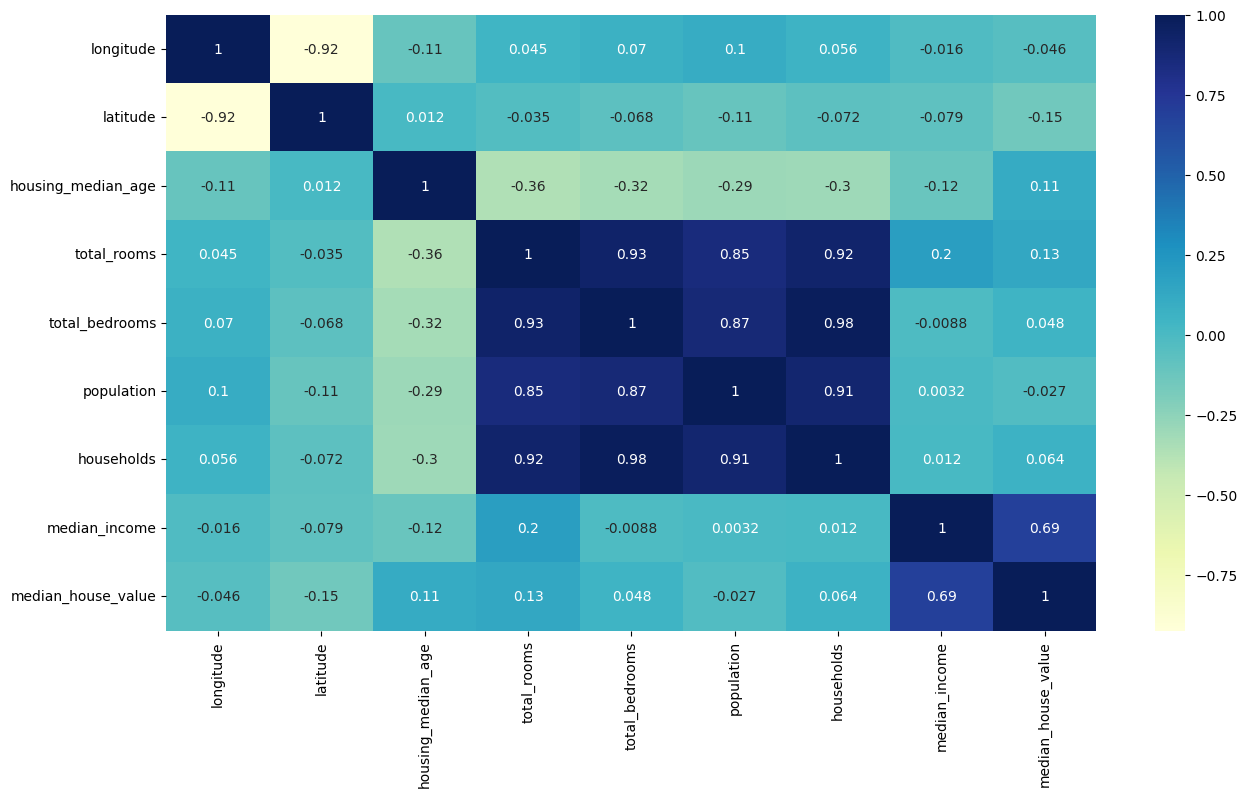

In [289]:
train_data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


In [290]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>],
       [<AxesSubplot: title={'center': 'bedroom_ratio'}>,
        <AxesSubplot: title={'center': 'household_rooms'}>,
        <AxesSubplot: >]], dtype=object)

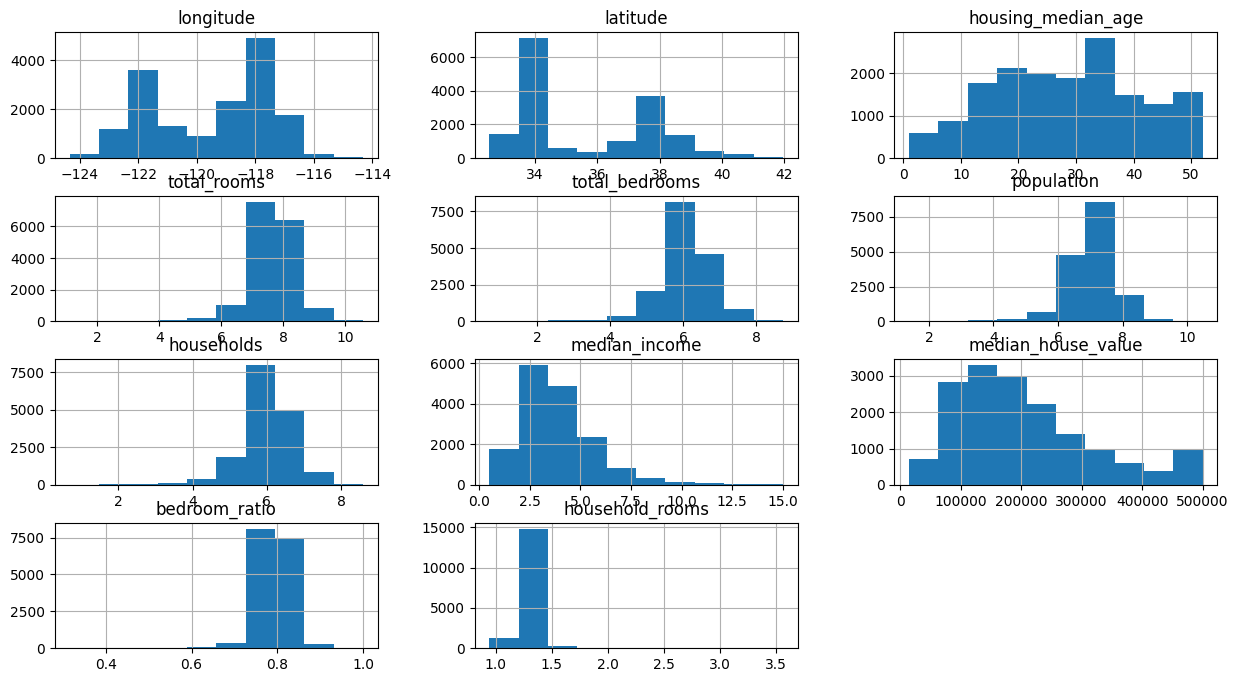

In [291]:
train_data.hist(figsize=(15,8))

/tmp/ipykernel_25157/4099726810.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: >

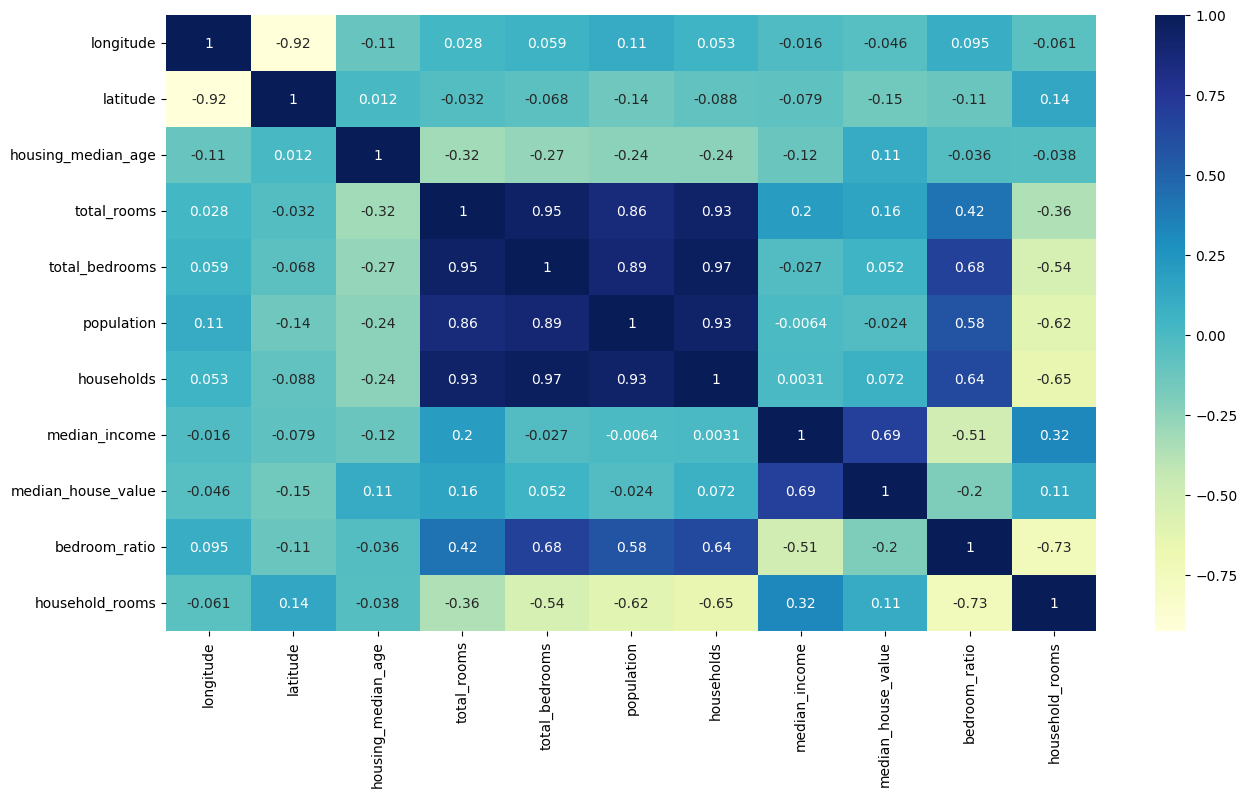

In [292]:
train_data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

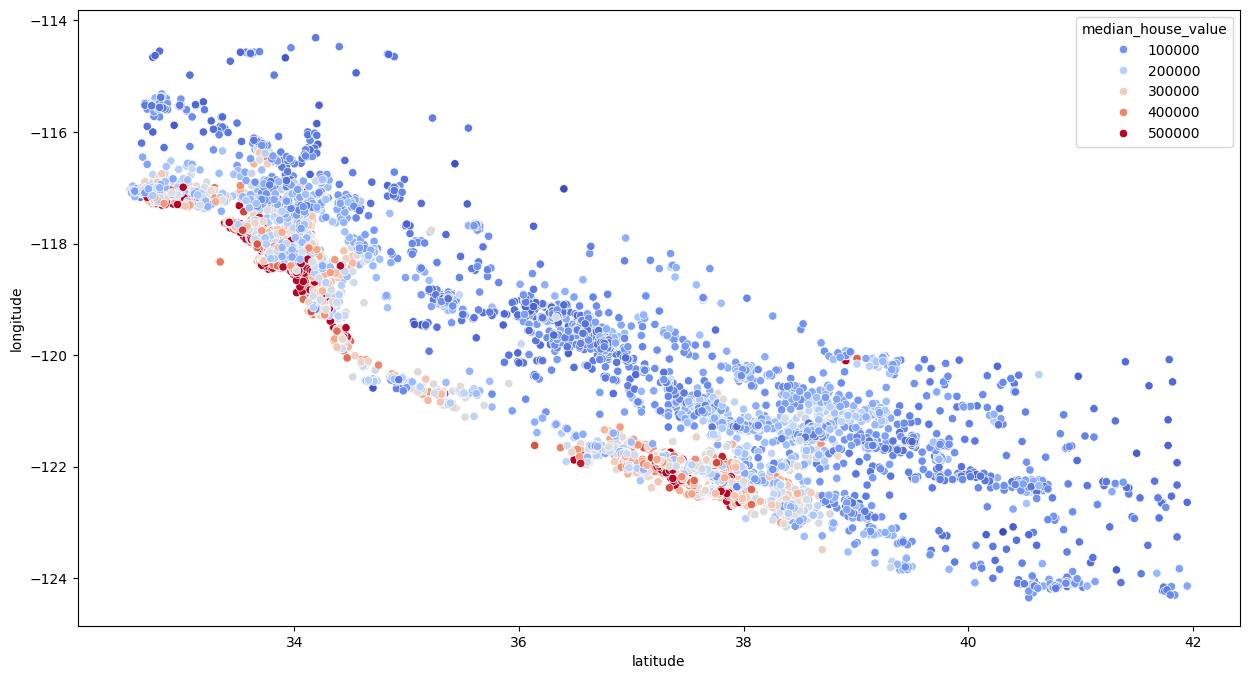

In [293]:
train_data
plt.figure(figsize= (15,8))
sns.scatterplot(x = 'latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')


In [294]:
train_data['bedroom_ratio']=  train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [295]:
# Concatenate X_train and X_test before splitting
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Concatenate X_train and X_test
full_data = pd.concat([X_train_full, X_test_full])

# Perform one-hot encoding
full_data = pd.get_dummies(full_data, columns=['ocean_proximity'])

# Split back into X_train and X_test
X_train = full_data[:len(X_train_full)]
X_test = full_data[len(X_train_full):]

In [296]:



# Perform data preprocessing on X_train
X_train['total_rooms'] = np.log(X_train['total_rooms'] + 1)
X_train['total_bedrooms'] = np.log(X_train['total_bedrooms'] + 1)
X_train['population'] = np.log(X_train['population'] + 1)
X_train['households'] = np.log(X_train['households'] + 1)
X_train['bedroom_ratio'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['household_rooms'] = X_train['total_rooms'] / X_train['households']




/tmp/ipykernel_25157/1228497896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['total_rooms'] = np.log(X_train['total_rooms'] + 1)
/tmp/ipykernel_25157/1228497896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['total_bedrooms'] = np.log(X_train['total_bedrooms'] + 1)
/tmp/ipykernel_25157/1228497896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [297]:
# Perform data preprocessing on X_test
X_test['total_rooms'] = np.log(X_test['total_rooms'] + 1)
X_test['total_bedrooms'] = np.log(X_test['total_bedrooms'] + 1)
X_test['population'] = np.log(X_test['population'] + 1)
X_test['households'] = np.log(X_test['households'] + 1)
X_test['bedroom_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['household_rooms'] = X_test['total_rooms'] / X_test['households']

/tmp/ipykernel_25157/3660601686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['total_rooms'] = np.log(X_test['total_rooms'] + 1)
/tmp/ipykernel_25157/3660601686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['total_bedrooms'] = np.log(X_test['total_bedrooms'] + 1)
/tmp/ipykernel_25157/3660601686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [298]:

# Initialize Linear Regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [299]:
reg.score(X_test, y_test)

0.6774155777151367

In [300]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [301]:
forest.score(X_test, y_test)

0.8228596670489783

In [302]:
param_grid = {
    "n_estimators": [30,50,100],
    "max_features": [2,4,6,8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [305]:
best_forest = grid_search.best_estimator_

In [306]:
best_forest.score(X_test, y_test)

0.8204005924515514